# Versão 1.0

Nessa versão utilizei K-means para os 6 clusteres, dados normalizados somente por feature e NÃO utilizei o filtro Kalman

In [1]:
#Importando as bibliotecas

# Data Analysis Tools
import pandas as pd
import numpy as np
from time import time
import logging as log

# Visualization Tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

# Machine Learning Tools
import sklearn
import sklearn.mixture as mix
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import preprocessing
import xgboost as xgb
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


#Scoreing tools
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_log_error

# plt.rcParams['figure.figsize'] = (10, 10)

def get_sensor_names(tag_names):
    """ Get tagnames starting with sensor.
    
    :param tag_names: Input time series data frame
    
    :return list of string tag names starting with sensor.
    """
    
    return [tag_name for tag_name in tag_names if tag_name.startswith('sensor')]

c:\programdata\anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\programdata\anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Tag Names que foram explicadas no arquivo Challenge Data description 2016
tag_names = ['unit','cycle_num', 'setting1','setting2',
         'setting3', 'sensor1', 'sensor2',
         'sensor3', 'sensor4', 'sensor5', 'sensor6',
         'sensor7', 'sensor8', 'sensor9', 'sensor10',
         'sensor11', 'sensor12', 'sensor13', 'sensor14',
         'sensor15', 'sensor16', 'sensor17', 'sensor18',
         'sensor19', 'sensor20', 'sensor21']

sensor_columns = get_sensor_names(tag_names)
train_data = pd.read_csv('train.txt', sep=' ', header=None, names=tag_names)

print "O dataset de treino tem {} linhas de dados e {} atributos.".format(*train_data.shape)

O dataset de treino tem 45918 linhas de dados e 26 atributos.


In [3]:
# Mostre a descrição do conjunto de dados

display(train_data.head(15))

# display(train_data['sensor5'].describe())

# display(train_data['sensor5'])

,unit,cycle_num,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025
5,1,6,20.0032,0.7017,0.0,491.19,607.37,1480.46,1258.90,9.35,...,315.36,2388.05,8053.17,9.2276,0.02,364,2324,100.00,24.44,14.7019
6,1,7,41.9998,0.8400,40.0,445.00,549.57,1354.43,1131.44,3.91,...,130.16,2387.88,8082.01,9.3753,0.02,331,2212,100.00,10.53,6.4254
7,1,8,0.0011,0.0000,100.0,518.67,642.08,1589.55,1407.59,14.62,...,521.74,2388.03,8133.29,8.4339,0.03,391,2388,100.00,38.98,23.2337
8,1,9,0.0011,0.0020,100.0,518.67,642.70,1586.18,1399.01,14.62,...,521.72,2388.08,8132.72,8.3922,0.03,392,2388,100.00,38.99,23.2412
9,1,10,42.0066,0.8400,40.0,445.00,549.83,1353.19,1125.09,3.91,...,130.32,2387.91,8085.94,9.3667,0.02,330,2212,100.00,10.75,6.4268


In [4]:
train_data.head()

,unit,cycle_num,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


Analisando os três *'settings'* para observar alguma correlação.

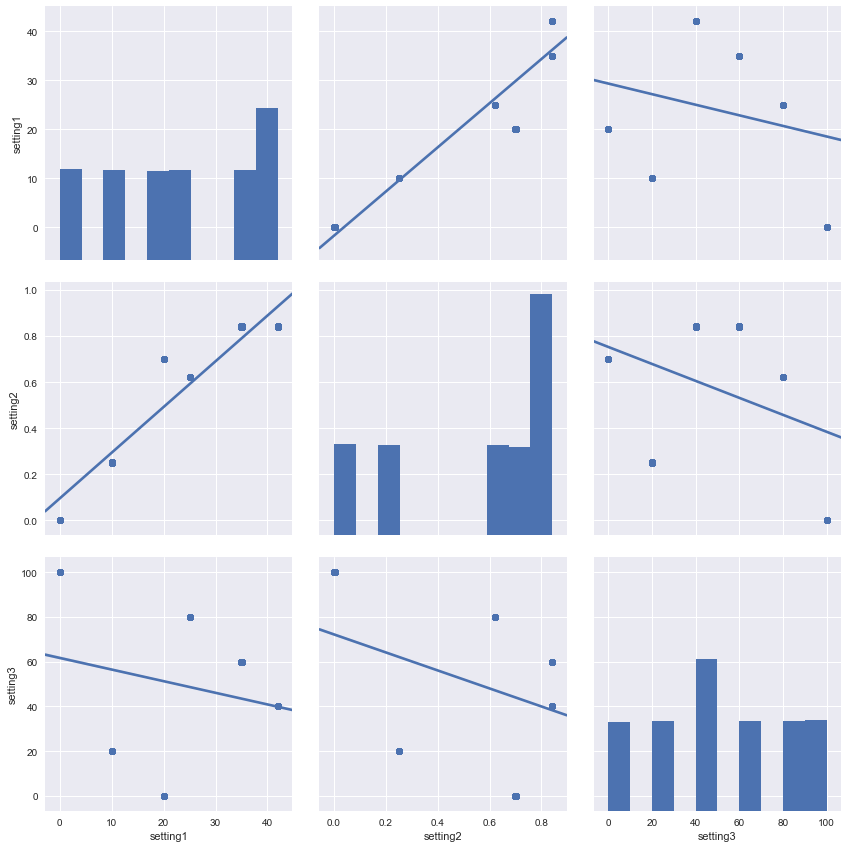

In [5]:
settings_data = train_data[['unit','setting1', 'setting2', 'setting3']]

target = train_data[['cycle_num']]

#display(settings_data)
sns.set(style="darkgrid", color_codes=True)
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados

sns.pairplot(settings_data.drop(['unit'], axis = 1),kind="reg", size=4)

#sns.jointplot("setting1", "setting2", data=settings_data, kind="reg",
                  #xlim=(0, 50), ylim=(0, 1), color="r", size=7)


Os *'setting1'* e *'setting2'* apresentam uma correlação, aparentemente linear.

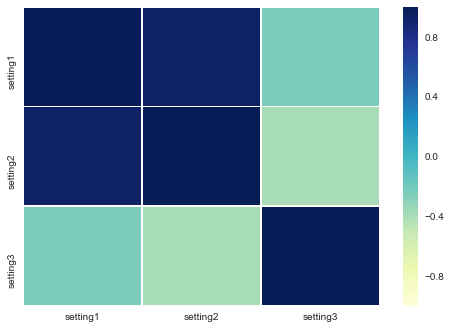

In [6]:
fig = sns.heatmap(settings_data.drop(['unit'], axis = 1).corr(),annot = False,fmt = ".2f",linewidths=.7,cmap="YlGnBu")

# plt.savefig('Correlation.png', format='png', dpi=1000)

In [8]:
# # plot feature importance manually RANDOM FOREST
# Build a forest and compute the feature importances

# load data
X = settings_data.drop(['unit'], axis = 1).values
y = target.values

forest = ExtraTreesClassifier(n_estimators=40,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))





# # plot feature importance manually XGBOOST
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from matplotlib import pyplot

# # load data
# X = settings_data.values
# y = target.values

# # fit model no training data
# model = XGBClassifier(n_estimators=100, silent=True, max_depth=3)
# model.fit(X, y)
# # feature importance
# print(model.feature_importances_)
# # # plot
# pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
# pyplot.xlabel('Features')
# pyplot.ylabel('Importances')
# pyplot.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Feature ranking:
1. feature 0 (0.746114)
2. feature 1 (0.253593)
3. feature 2 (0.000292)


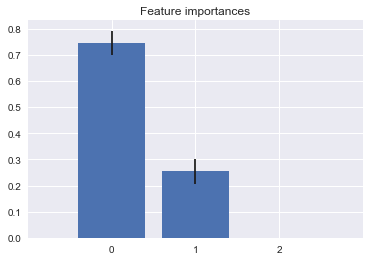

<Figure size 432x288 with 0 Axes>

In [9]:
# plot# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


plt.savefig('Features importances.png', format='png', dpi=100)

In [7]:
new_setting = pd.DataFrame({'mean_setting1_and_setting2':(settings_data['setting1'] + settings_data['setting2'])/2})

# new_setting = new_setting.rename(columns={'A': 'setting_new'})

s = settings_data['setting3']

r = settings_data['unit']

settings_final = pd.concat([new_setting,s], axis = 1)

print settings_final.tail()

       mean_setting1_and_setting2  setting3
45913                    21.42330      40.0
45914                    21.42220      40.0
45915                    21.41995      40.0
45916                    17.92130      60.0
45917                    12.81435      80.0


In [8]:
scores= []
cluster_sizes = range(2,10)

#Set a seed value for the random number enerator to get repeatable results
np.random.seed(10)

for num_clusters in cluster_sizes:
    clusterer = KMeans(n_clusters=num_clusters, 
                    n_init=100, 
                    max_iter=5000,
                    random_state=10)
    
    cluster_labels = clusterer.fit_predict(settings_final)
    
    size = num_clusters
    
    centers = clusterer.cluster_centers_
    
    silh_score = silhouette_score(settings_final.values, cluster_labels, sample_size=2000)
    scores.append(silh_score)
    print ('O resultado silh_score e = {}'.format(silh_score),'para um cluster_size de {}'.format(size))
    #print ('O centro do cluster e: {}'.format(centers))
    
   
print ('\n')    
print 'O número ótimo de cluster é = {}'.format(cluster_sizes[np.argmax(scores)])


('O resultado silh_score e = 0.631850562628', 'para um cluster_size de 2')
('O resultado silh_score e = 0.717413764959', 'para um cluster_size de 3')
('O resultado silh_score e = 0.764324865542', 'para um cluster_size de 4')
('O resultado silh_score e = 0.904040749511', 'para um cluster_size de 5')
('O resultado silh_score e = 0.999924619046', 'para um cluster_size de 6')
('O resultado silh_score e = 0.904225886488', 'para um cluster_size de 7')
('O resultado silh_score e = 0.853235574408', 'para um cluster_size de 8')
('O resultado silh_score e = 0.792640487204', 'para um cluster_size de 9')


O número ótimo de cluster é = 6


In [9]:
print('Optimimum Cluster size = {}'.format(cluster_sizes[np.argmax(scores)]))
chosen_cluster_size = cluster_sizes[np.argmax(scores)]


Optimimum Cluster size = 6


array([5, 2, 1, 0, 3, 4], dtype=int64)

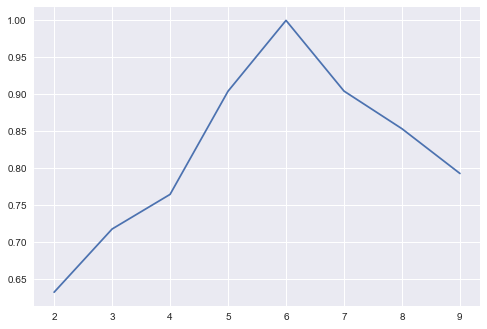

In [10]:
plt.plot(cluster_sizes, scores)

predictions = KMeans(n_clusters=chosen_cluster_size).fit_predict(settings_final)


values = predictions
index = ['y']
columns = ['overall setting']

overall_setting = pd.DataFrame(data=values, columns=columns, dtype='int')

display(pd.unique(overall_setting['overall setting']))


# settings_final.drop(['mean_setting1_and_setting2'], axis=1, inplace=True)
# settings_final['overall_setting']= train_data['overall_setting'].astype('float')

TypeError: scatter() takes at least 3 arguments (3 given)

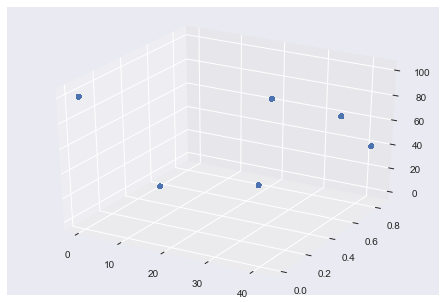

In [13]:
#Plot dos clusteres realizados

from mpl_toolkits.mplot3d import Axes3D

C = centers

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(settings_data['setting1'],settings_data['setting2'],settings_data['setting3'])
ax.scatter(centers, marker='*', c='r')
plt.xlabel('setting1', fontsize=20 )
plt.ylabel('setting2', fontsize=20)
plt.zlabel('setting3', fontsize=20)
plt.tick_params(labelsize=15)


In [11]:
sensor_names = get_sensor_names(tag_names)

In [12]:
sensor_data = train_data[sensor_names]

In [13]:
# t = pd.DataFrame(train_data['overall_setting'],dtype='float')

frames = [r,overall_setting,sensor_data]

data_set = pd.concat(frames, axis = 1)

target = train_data[['cycle_num']]

n = pd.DataFrame(data_set)

Train = data_set.insert(loc=0, column='cycle_num', value=target)

data_set.head()

,cycle_num,unit,overall setting,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,5,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,2,1,2,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,3,1,1,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,4,1,0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,5,1,3,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


In [ ]:
# #Plot unit x parâmetros de operação
# fig = plt.figure(figsize=(30,12))
# plt.subplot(2, 1, 1)
# plt.scatter(data_set['unit'], data_set['overall setting'])
# plt.xlabel('unit', fontsize=15)
# plt.ylabel('overall setting', fontsize=15)
# plt.tick_params(labelsize=15)

# #Plot ciclos x parâmetros de operação
# fig = plt.figure(figsize=(30,15))
# plt.subplot(2, 1, 2)
# plt.scatter(target, data_set['overall setting'])
# plt.xlabel('target', fontsize=15)
# plt.ylabel('overall setting', fontsize=15)
# plt.tick_params(labelsize=15)

# #plot ciclos x unit
# fig = plt.figure(figsize=(90,50))
# plt.subplot(2, 1, 2)
# plt.scatter(data_set['unit'], target)
# plt.xlabel('unit', fontsize=15)
# plt.ylabel('target', fontsize=15)
# plt.tick_params(labelsize=15)




In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')



'''
==============
3D scatterplot - CODIGO RETIRADO DA BIBLIOTECA DO MATPLOTLIB
==============

Demonstration of a basic scatterplot in 3D.
'''

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(40,25))
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('y', 'o', -50, -25), ('b', '+', -30, -5)]:
    xs = data_set['unit']
    ys = target
    zs = data_set['overall setting']
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('unit', fontsize=50 )
ax.set_ylabel('target', fontsize=50)
ax.set_zlabel('overall setting', fontsize=50)
ax.tick_params(labelsize=45)
ax.yaxis._axinfo['space_factor'] = 3.0




plt.show()



# Normalize Function

In [14]:
#Normalizing the data by operations settings

min_max_scaler = preprocessing.MinMaxScaler()

# settings_range = range(0,6)
# np.random.seed(2015)



def normalize (normal):
        
    clustered_data_normalized = pd.DataFrame()

    tag_names_2 = ['unit','cycle_num', 'overall_setting', 'sensor1', 'sensor2',
         'sensor3', 'sensor4', 'sensor5', 'sensor6',
         'sensor7', 'sensor8', 'sensor9', 'sensor10',
         'sensor11', 'sensor12', 'sensor13', 'sensor14',
         'sensor15', 'sensor16', 'sensor17', 'sensor18',
         'sensor19', 'sensor20', 'sensor21']
    
    
    colNames = ('sensor1', 'sensor2',
         'sensor3', 'sensor4', 'sensor5', 'sensor6',
         'sensor7', 'sensor8', 'sensor9', 'sensor10',
         'sensor11', 'sensor12', 'sensor13', 'sensor14',
         'sensor15', 'sensor16', 'sensor17', 'sensor18',
         'sensor19', 'sensor20', 'sensor21')

    for settings in range(0,6):
        
        print ('Normalizando setting{}'.format(settings))
                     
        clustered_data_to_normalize = normal.loc[normal['overall setting'] == settings]
        
#         print clustered_data_to_normalize.describe()

        df_resto = pd.DataFrame(clustered_data_to_normalize[['unit','cycle_num','overall setting']])
        
        #print df_resto.describe()
        
        min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1),copy=True)
        
        pre_scaled = min_max_scaler.fit_transform(clustered_data_to_normalize.drop(['overall setting', 'unit','cycle_num'], axis = 1))

        scaled = pd.DataFrame(pre_scaled, columns = colNames,index = df_resto.index)
        
        scaled_2 = pd.concat([df_resto,scaled],axis=1)

#         print clustered_data_normalized.isnull().sum()
        
        clustered_data_normalized = clustered_data_normalized.append(scaled_2)
        
        print ('Done normalization!')
        
        #print scaled.shape
        #print df_resto.shape
                     
                                                          
return (clustered_data_normalized)



data_set_normalized = normalize(data_set)
# data_set_normalized.loc[data_set_normalized['overall setting'] == 3]
data_set_normalized.describe()
# data_set_normalized.isnull().sum()

Normalizando setting0
Done normalization!
Normalizando setting1
Done normalization!
Normalizando setting2
Done normalization!
Normalizando setting3
Done normalization!
Normalizando setting4
Done normalization!
Normalizando setting5
Done normalization!


,unit,cycle_num,overall setting,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,45918.000000,45918.000000,45918.000000,45918.0,45918.000000,45918.000000,45918.000000,45918.0,45918.000000,45918.000000,...,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.0,45918.0,45918.000000,45918.000000
mean,109.396511,110.307396,2.557036,0.0,0.451738,0.446232,0.435464,0.0,0.456335,0.524605,...,0.519843,0.277382,0.204209,0.449743,0.034126,0.463945,0.0,0.0,0.509241,0.526724
std,62.866193,68.420545,1.621502,0.0,0.140963,0.137110,0.152586,0.0,0.441024,0.144702,...,0.146120,0.163848,0.095000,0.152193,0.181555,0.151002,0.0,0.0,0.147335,0.142505
min,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,54.000000,53.000000,1.000000,0.0,0.353659,0.351822,0.327783,0.0,0.000000,0.429577,...,0.423913,0.161585,0.149132,0.341259,0.000000,0.333333,0.0,0.0,0.407895,0.431886
50%,110.000000,106.000000,3.000000,0.0,0.443730,0.438213,0.421244,0.0,0.500000,0.528169,...,0.523179,0.226190,0.187935,0.436393,0.000000,0.444444,0.0,0.0,0.513158,0.531028
75%,164.000000,160.000000,4.000000,0.0,0.541796,0.533113,0.530718,0.0,1.000000,0.625352,...,0.620309,0.360119,0.234292,0.545970,0.000000,0.555556,0.0,0.0,0.611111,0.625039
max,218.000000,357.000000,5.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


# Correlation between the sensors

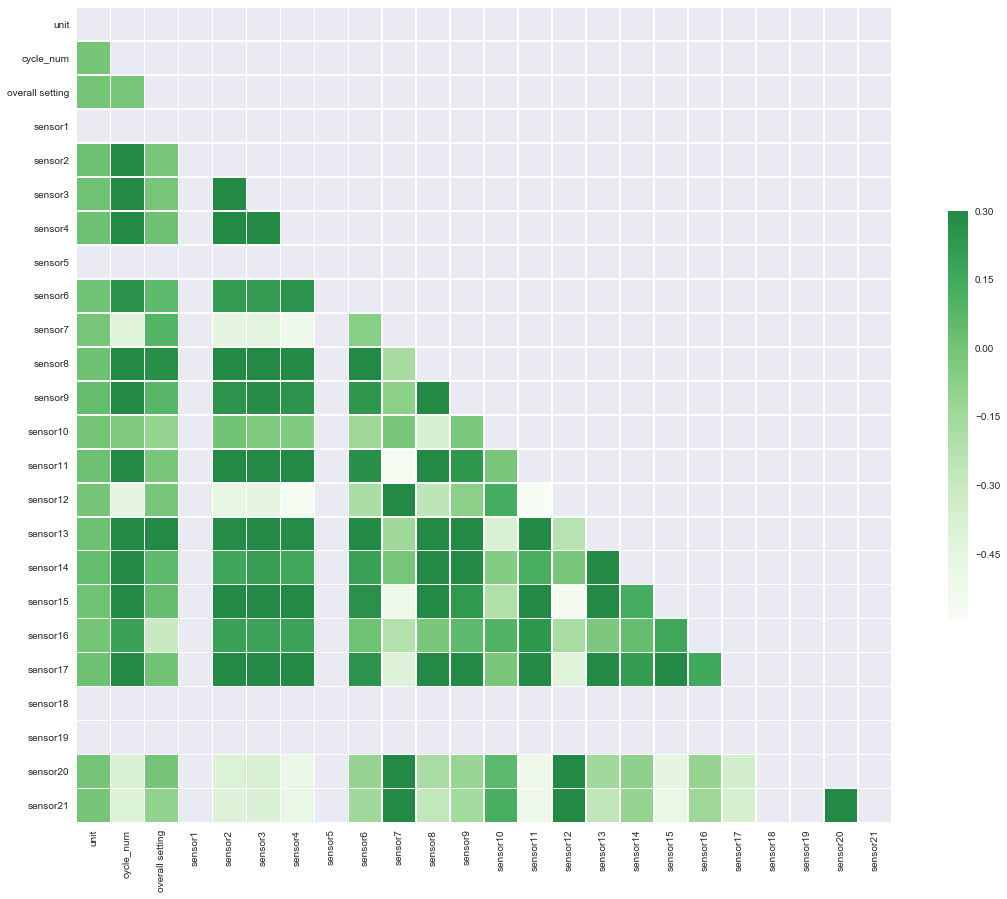

In [18]:
def plot_corr_heatmap(corr_matrix):
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 15))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap="Greens", vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
# Compute the correlation matrix
corr = data_set_normalized.corr()
plot_corr_heatmap(corr)


In [15]:
train_final_data = data_set_normalized.drop(['sensor1', 'sensor5','sensor18','sensor19','sensor21'], axis = 1)

train_final_data.describe()

,unit,cycle_num,overall setting,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,109.396511,110.307396,2.557036,0.451738,0.446232,0.435464,0.456335,0.524605,0.265908,0.180788,0.271092,0.423734,0.519843,0.277382,0.204209,0.449743,0.034126,0.463945,0.509241
std,62.866193,68.420545,1.621502,0.140963,0.137110,0.152586,0.441024,0.144702,0.152705,0.099618,0.444528,0.162704,0.146120,0.163848,0.095000,0.152193,0.181555,0.151002,0.147335
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,53.000000,1.000000,0.353659,0.351822,0.327783,0.000000,0.429577,0.159091,0.121765,0.000000,0.306667,0.423913,0.161585,0.149132,0.341259,0.000000,0.333333,0.407895
50%,110.000000,106.000000,3.000000,0.443730,0.438213,0.421244,0.500000,0.528169,0.221498,0.161769,0.000000,0.406897,0.523179,0.226190,0.187935,0.436393,0.000000,0.444444,0.513158
75%,164.000000,160.000000,4.000000,0.541796,0.533113,0.530718,1.000000,0.625352,0.337748,0.209695,1.000000,0.521127,0.620309,0.360119,0.234292,0.545970,0.000000,0.555556,0.611111
max,218.000000,357.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# # Compute the correlation matrix
# corr = train_final_data.corr()
# # plot_corr_heatmap(corr)
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt
# from matplotlib.collections import EllipseCollection

# def plot_corr_ellipses(data, ax=None, **kwargs):

#     M = np.array(data)
#     if not M.ndim == 2:
#         raise ValueError('data must be a 2D array')
#     if ax is None:
#         fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
#         ax.set_xlim(-0.5, M.shape[1] - 0.5)
#         ax.set_ylim(-0.5, M.shape[0] - 0.5)

#     # xy locations of each ellipse center
#     xy = np.indices(M.shape)[::-1].reshape(2, -1).T

#     # set the relative sizes of the major/minor axes according to the strength of
#     # the positive/negative correlation
#     w = np.ones_like(M).ravel()
#     h = 1 - np.abs(M).ravel()
#     a = 45 * np.sign(M).ravel()

#     ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
#                            transOffset=ax.transData, array=M.ravel(), **kwargs)
#     ax.add_collection(ec)

#     # if data is a DataFrame, use the row/column names as tick labels
#     if isinstance(data, pd.DataFrame):
#         ax.set_xticks(np.arange(M.shape[1]))
#         ax.set_xticklabels(data.columns, rotation=90)
#         ax.set_yticks(np.arange(M.shape[0]))
#         ax.set_yticklabels(data.index)

#     return ec

# fig2, ax2 = plt.subplots(1, 1)
# data2 = train_final_data
# m2 = plot_corr_ellipses(data2, ax=ax2, cmap='seismic', clim=[-1, 1])
# cb2 = fig2.colorbar(m2)
# ax2.margins(0.3)
# plt.show(figsize=(10,10))




# Definição do set de teste e do set target

In [16]:
target_final_data = train_final_data['cycle_num']

train_final_data = train_final_data.drop(['cycle_num'], axis = 1)


# Modelos de regressão

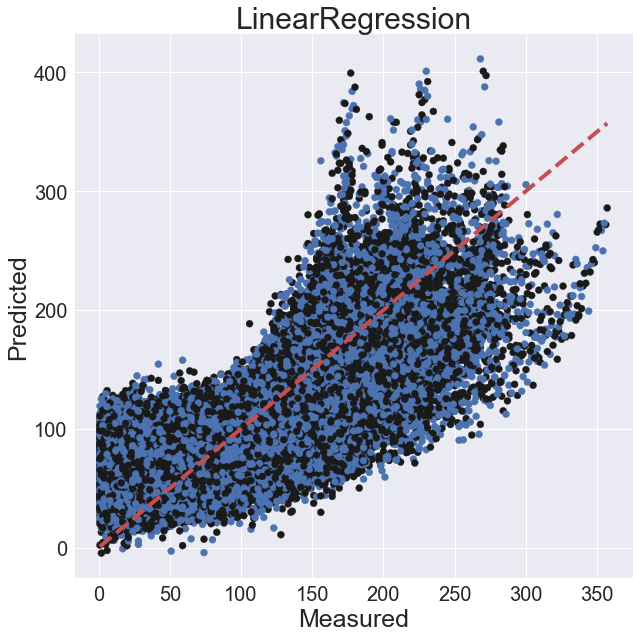

In [17]:
#ATENÇÃO------------->>>>>>>>>>> "Teste com o cross_val_predict para verificar os dados? Entender o que essa função realiza"
from xgboost import XGBRegressor as xgb
lr = linear_model.LinearRegression()
# lr = xgb(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
boston = train_final_data
y = target_final_data

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, train_final_data, target_final_data, cv=100)

fig, ax = plt.subplots(figsize=(10,10))
plt.title(lr.__class__.__name__,fontsize=30)
ax.scatter(y, predicted, c=('b', 'k'))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
ax.set_xlabel('Measured',fontsize=25)
ax.set_ylabel('Predicted',fontsize=25)
ax.tick_params(labelsize=20)
plt.savefig(lr.__class__.__name__+'_Modelo.png', format='png', dpi=100)
plt.show()

In [32]:
#Funções para regressão dos dados:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
     
    clf.fit(X_train, y_train)
    print "O modelo foi treinado!"
    return 

def predict_labels_train(clf, X, y):
    ''' Faz uma estimativa utilizando um modelo de regressão ajustado em algum score ainda a ser definido. '''
       
    y_pred = clf.predict(X)
    
    # Imprime os resultados de retorno
    print ("Pronto!\n As previsões de treino para o modelo {} foram feitas!".format(clf.__class__.__name__))
    return  {"R2 score": r2_score(y.values, y_pred), 
             "Explained Variance Score": explained_variance_score(y.values, y_pred),
             "Mean Squared Error": mean_squared_error(y.values, y_pred)
            }

def predict_labels_test(clf, X, y):
    ''' Faz uma estimativa utilizando um modelo de regressão ajustado em algum score ainda a ser definido. '''
       
    y_pred = clf.predict(X)
#     y_pred_analise = pd.DataFrame(y_pred['cycle_num_pred'])
    
    
    
    
    # Imprime os resultados de retorno
    print ("Pronto!\n As previsões de teste para o modelo {} foram feitas!\n".format(clf.__class__.__name__))
    return  {"R2 score": r2_score(y.values, y_pred), 
             "Explained Variance Score": explained_variance_score(y.values, y_pred),
             "Mean Squared Error": mean_squared_error(y.values, y_pred),
             }

# def metrica(d,a1,a2)

#     for i, x in enumerate(d):
#         if (x < 0):
#             np.exp(-(d/a1))
#         else:
#             np.exp(d/a2)

In [36]:
# Neste passo irei realizar os modelos de regressão e mostrar os resultados

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from xgboost import XGBRegressor as xgb

Regression = [DecisionTreeRegressor(),SVR(C=1.0, epsilon=0.2) ,KNeighborsRegressor(n_neighbors=2,algorithm = 'auto'),linear_model.LinearRegression(),
              xgb(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7) 
             ]

resultados = { 
        'Modelo utilizado': [],
        'Conjunto de Treino': [], 
        'Conjunto de Teste': [],
        'Pontuação R2 (treinamento)': [], 
        'Pontuação R2 (teste)': [],
        'Explained Variance Score (treinamento)':[],
        'Explained Variance Score (teste)':[],
        'Mean Squared Error (treinamento)':[],
        'Mean Squared Error (teste)':[]
            }

Dados_crus = [train_test_split(train_data, target, train_size=0.7 , random_state = 1)]
Dados_normalizados = [train_test_split(train_final_data, target_final_data, train_size=0.7 , random_state = 1)]

for clf in Regression:
    for split in Dados_normalizados:
        
        print ("Próximo modelo...\n")
        X_train, X_test, y_train, y_test = split
        
        time_train = train_classifier(clf, X_train, y_train)
        
        time_predict_train = predict_labels_train(clf, X_train, y_train)
        
        time_predict_test = predict_labels_test(clf, X_test, y_test)
        
        resultados['Modelo utilizado'].append(clf.__class__.__name__)
        resultados['Conjunto de Treino'].append(X_train.shape)
        resultados['Conjunto de Teste'].append(X_test.shape)
        resultados['Pontuação R2 (treinamento)'].append(time_predict_train["R2 score"])
        resultados['Pontuação R2 (teste)'].append(time_predict_test["R2 score"])
        resultados['Explained Variance Score (treinamento)'].append(time_predict_train["Explained Variance Score"])
        resultados['Explained Variance Score (teste)'].append(time_predict_test["Explained Variance Score"])
        resultados['Mean Squared Error (treinamento)'].append(time_predict_train["Mean Squared Error"])
        resultados['Mean Squared Error (teste)'].append(time_predict_test["Mean Squared Error"])
                
            
#         predicted = cross_val_predict(clf, train_final_data, target_final_data, cv=100)

#         fig, ax = plt.subplots(figsize=(10,10))
#         plt.title(lr.__class__.__name__,fontsize=30)
#         ax.scatter(y, predicted, c=('b', 'k'))
#         ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
#         ax.set_xlabel('Measured',fontsize=25)
#         ax.set_ylabel('Predicted',fontsize=25)
#         ax.tick_params(labelsize=20)
#         plt.savefig(clf.__class__.__name__+'_Modelo.png', format='png', dpi=100)
#         plt.show()
                  
Results = pd.DataFrame(resultados)
Results = Results[['Modelo utilizado','Pontuação R2 (treinamento)','Explained Variance Score (treinamento)','Mean Squared Error (treinamento)',
                  'Pontuação R2 (teste)','Explained Variance Score (teste)','Mean Squared Error (teste)','Conjunto de Treino','Conjunto de Teste']]
Results.head()


Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo DecisionTreeRegressor foram feitas!
Pronto!
 As previsões de teste para o modelo DecisionTreeRegressor foram feitas!

Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo SVR foram feitas!
Pronto!
 As previsões de teste para o modelo SVR foram feitas!

Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo KNeighborsRegressor foram feitas!
Pronto!
 As previsões de teste para o modelo KNeighborsRegressor foram feitas!

Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo LinearRegression foram feitas!
Pronto!
 As previsões de teste para o modelo LinearRegression foram feitas!

Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo XGBRegressor foram feitas!
Pronto!
 As previsões de teste para o modelo XGBRegressor foram feitas!



,Modelo utilizado,Pontuação R2 (treinamento),Explained Variance Score (treinamento),Mean Squared Error (treinamento),Pontuação R2 (teste),Explained Variance Score (teste),Mean Squared Error (teste),Conjunto de Treino,Conjunto de Teste
0,DecisionTreeRegressor,1.000000,1.000000,0.000000,0.324053,0.324110,3126.601989,"(32142, 18)","(13776, 18)"
1,SVR,0.189945,0.190417,3811.443547,0.182152,0.182684,3782.966400,"(32142, 18)","(13776, 18)"
2,KNeighborsRegressor,0.895178,0.895340,493.204024,0.675018,0.676191,1503.208769,"(32142, 18)","(13776, 18)"
3,LinearRegression,0.577639,0.577639,1987.277013,0.565163,0.565200,2011.343452,"(32142, 18)","(13776, 18)"
4,XGBRegressor,0.834679,0.834679,777.860815,0.764204,0.764211,1090.677434,"(32142, 18)","(13776, 18)"


# Modelo escolhido

# XGBOOST

Utilizando o XGboost para uma primeira rodada de previsão

In [37]:
# Neste passo irei realizar os modelos de regressão e mostrar os resultados

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from xgboost import XGBRegressor as xgb

Regression = [xgb(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)]

resultados = { 
        'Modelo utilizado': [],
        'Conjunto de Treino': [], 
        'Conjunto de Teste': [],
        'Pontuação R2 (treinamento)': [], 
        'Pontuação R2 (teste)': [],
        'Explained Variance Score (treinamento)':[],
        'Explained Variance Score (teste)':[],
        'Mean Squared Error (treinamento)':[],
        'Mean Squared Error (teste)':[]
            }

Dados_crus = [train_test_split(train_data, target, train_size=0.7 , random_state = 1)]
Dados_normalizados = [train_test_split(train_final_data, target_final_data, train_size=0.7 , random_state = 1)]

for clf in Regression:
    for split in Dados_normalizados:
        
        print ("Próximo modelo...\n")
        X_train, X_test, y_train, y_test = split
        
        time_train = train_classifier(clf, X_train, y_train)
        
        time_predict_train = predict_labels_train(clf, X_train, y_train)
        
        time_predict_test = predict_labels_test(clf, X_test, y_test)
        
        resultados['Modelo utilizado'].append(clf.__class__.__name__)
        resultados['Conjunto de Treino'].append(X_train.shape)
        resultados['Conjunto de Teste'].append(X_test.shape)
        resultados['Pontuação R2 (treinamento)'].append(time_predict_train["R2 score"])
        resultados['Pontuação R2 (teste)'].append(time_predict_test["R2 score"])
        resultados['Explained Variance Score (treinamento)'].append(time_predict_train["Explained Variance Score"])
        resultados['Explained Variance Score (teste)'].append(time_predict_test["Explained Variance Score"])
        resultados['Mean Squared Error (treinamento)'].append(time_predict_train["Mean Squared Error"])
        resultados['Mean Squared Error (teste)'].append(time_predict_test["Mean Squared Error"])
                
            
#         predicted = cross_val_predict(clf, train_final_data, target_final_data, cv=100)

#         fig, ax = plt.subplots(figsize=(10,10))
#         plt.title(clf.__class__.__name__,fontsize=30)
#         ax.scatter(y, predicted, c=('b', 'k'))
#         ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
#         ax.set_xlabel('Measured',fontsize=25)
#         ax.set_ylabel('Predicted',fontsize=25)
#         ax.tick_params(labelsize=20)
#         plt.savefig(clf.__class__.__name__+'_Modelo.png', format='png', dpi=100)
#         plt.show()
                  
Results_xgboost = pd.DataFrame(resultados)
Results_xgboost = Results_xgboost[['Modelo utilizado','Pontuação R2 (treinamento)','Explained Variance Score (treinamento)','Mean Squared Error (treinamento)',
                  'Pontuação R2 (teste)','Explained Variance Score (teste)','Mean Squared Error (teste)','Conjunto de Treino','Conjunto de Teste']]
Results_xgboost.head()


Próximo modelo...

O modelo foi treinado!
Pronto!
 As previsões de treino para o modelo XGBRegressor foram feitas!
Pronto!
 As previsões de teste para o modelo XGBRegressor foram feitas!



,Modelo utilizado,Pontuação R2 (treinamento),Explained Variance Score (treinamento),Mean Squared Error (treinamento),Pontuação R2 (teste),Explained Variance Score (teste),Mean Squared Error (teste),Conjunto de Treino,Conjunto de Teste
0,XGBRegressor,0.834679,0.834679,777.860815,0.764204,0.764211,1090.677434,"(32142, 18)","(13776, 18)"


# Ajustando o modelo do Xgboost

In [65]:
def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
#     explainedvariancescore =  explained_variance_score(y_true, y_predict)
#     meansquarederror = mean_squared_error(y_true, y_predict)
          
    
    # Devolver a pontuação
    return score

In [75]:
def fit_model(X, y):

    from xgboost import XGBRegressor as xgb
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 1)
#     cv_sets = train_test_split(X, y, train_size=0.7 , random_state = 1)
    estimator = xgb()
   
    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    Params = {'n_estimators':[100,150,200], 
          'learning_rate':[0.05,0.07,0.4],
          'colsample_bytree':[0.5,0.7,1],
          'max_depth':[5,7,10]
         }

    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV( estimator=estimator, param_grid=Params, scoring=scoring_fnc, cv=cv_sets)
    #grid = GridSearchCV( estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets2)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)
   

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

print ('Tudo ok até então!')

Tudo ok até então!


In [76]:
reg = fit_model(train_final_data, target_final_data)

In [80]:
# Produzir valores para 'max_depth'
print "O parâmetro 'n_estimators' é {} para o modelo ótimo.".format(reg.get_params()['n_estimators'])
print "O parâmetro 'learning_rate' é {} para o modelo ótimo.".format(reg.get_params()['learning_rate'])
print "O parâmetro 'colsample_bytree' é {} para o modelo ótimo.".format(reg.get_params()['colsample_bytree'])
print "O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth'])

O parâmetro 'n_estimators' é 200 para o modelo ótimo.
O parâmetro 'learning_rate' é 0.4 para o modelo ótimo.
O parâmetro 'colsample_bytree' é 0.7 para o modelo ótimo.
O parâmetro 'max_depth' é 5 para o modelo ótimo.


# Modelo Final XGBOOST

In [62]:
#Dados Finais

X_train, X_test, y_train, y_test = train_test_split(train_final_data, target_final_data, train_size=0.7 , random_state = 1)

In [71]:
# Params = (n_estimators = 200, 
#          learning_rate = 0.4,
#          colsample_bytree = 0.7,
#          max_depth = 5)
         

estimator = xgb(n_estimators = 200,learning_rate = 0.4,colsample_bytree = 0.7,max_depth = 5)

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

y_pred_final = pd.DataFrame(y_pred, columns = ['y_pred'])
X_text_df = pd.DataFrame(X_test)


In [73]:
y_pred_final.head()

,y_pred
0,211.110870
1,66.995033
2,50.412590
3,94.742142
4,54.175850


In [74]:
target.head()

,cycle_num
0,1
1,2
2,3
3,4
4,5


In [75]:
X_text_df.head()

,unit,overall setting,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20
19501,93,2,0.617363,0.672082,0.583129,1.0,0.507042,0.522727,0.385528,0.0,0.868966,0.309051,0.622222,0.394509,0.639694,0.0,0.700000,0.250000
12583,60,1,0.333333,0.431122,0.262818,0.0,0.853801,0.231270,0.226390,0.0,0.267123,0.471014,0.250000,0.213920,0.370919,0.0,0.333333,0.766667
19605,94,3,0.448916,0.240168,0.260965,1.0,0.783099,0.304762,0.161371,0.0,0.260000,0.418519,0.270833,0.202984,0.192963,0.0,0.300000,0.723684
32627,155,4,0.481061,0.353655,0.323280,0.5,0.765823,0.218543,0.217900,1.0,0.328467,0.523605,0.226837,0.208893,0.302797,0.0,0.444444,0.389610
11737,55,3,0.300310,0.413312,0.451754,0.0,0.611268,0.222222,0.146599,0.0,0.393333,0.474074,0.226190,0.157574,0.421869,0.0,0.300000,0.421053


Analisando os dados, podemos fazer um check de qualidade de dados ao olharmos para a variância dos dados.

Sensores com baixa variância apresentam dados com distribuição mais próxima à normal.

In [ ]:
# def is_zero(series):
#     return series == 0

# #avaliando a variãncia dos dados agrupados por settings de cada sensor:
# variance_by_setting = train_data[sensor_names + ['overall_setting']].groupby('overall_setting').var()

# #Encontrando os sensores com variância zero
# sensor_variance = variance_by_setting.apply(is_zero, axis=0).all()

# display(variance_by_setting)

In [ ]:
# Generate a list of the sensors with zero variance.
sensor_drop_list=sensor_variance[sensor_variance].index.values

display(sensor_drop_list)
print ('\n')

# Drop these sensors from the training_data
train_data_subset = train_data.drop(sensor_drop_list, axis=1, inplace=False)

display(train_data_subset.head())

In [ ]:
sensor_names = get_sensor_names(train_data_subset)

train_data_subset[sensor_names].corr()

#Note below was determined visually
high_corr_cols = ['sensor3','sensor4','sensor6',
                  'sensor7','sensor12','sensor17',
                  'sensor20']
high_corr_cols

corr = train_data[sensor_names].corr()
corr[(corr > 0.99) & (corr < 1.0)]

# teste = corr[(corr > 0.95) & (corr < 1.0)]

In [ ]:
def plot_corr_heatmap(corr_matrix):
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
# Compute the correlation matrix
corr = train_data_subset[sensor_names].corr()
plot_corr_heatmap(corr)

In [ ]:
train_data_subset = train_data_subset.drop(high_corr_cols, axis=1, inplace=False)

In [ ]:
sensor_names = get_sensor_names(train_data_subset)

corr = train_data_subset[sensor_names].corr()
plot_corr_heatmap(corr)